In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import keras
import sklearn
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import InputLayer,Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
#Importing train dataset and labels

In [3]:
labels=pd.read_json(r"C:\Users\LENOVO\Downloads\data\class_dict_10.json")

In [4]:
labels

,n03662601,n02165456,n07873807,n07720875,n04146614,n01882714,n07920052,n02509815,n07747607,n04285008
class,lifeboat,ladybug,pizza,bell pepper,school bus,koala,espresso,panda,orange,sports car
index,0,1,2,3,4,5,6,7,8,9


In [5]:
fv=[]
cv=[]
for folder in os.listdir(r"C:\Users\LENOVO\Downloads\data\class_10_train"):
    print(folder)
    for files in os.listdir(r"C:\Users\LENOVO\Downloads\data\class_10_train\{}\images".format(folder)):
        fv.append(cv2.imread(r"C:\Users\LENOVO\Downloads\data\class_10_train\{}\images\{}".format(folder,files)))
        
        cv.append(labels.loc["class"][folder])

n01882714
n02165456
n02509815
n03662601
n04146614
n04285008
n07720875
n07747607
n07873807
n07920052


In [6]:
fv1 = []
for val in fv:
    if val is not None :
        fv1.append(val)

In [7]:
fv1

[array([[[ 93, 123, 128],
         [ 99, 129, 134],
         [100, 126, 132],
         ...,
         [143, 156, 164],
         [175, 191, 197],
         [ 72,  88,  94]],
 
        [[ 94, 124, 129],
         [ 90, 119, 124],
         [109, 135, 141],
         ...,
         [142, 155, 163],
         [161, 177, 183],
         [116, 132, 138]],
 
        [[ 99, 128, 133],
         [ 91, 120, 125],
         [142, 168, 174],
         ...,
         [179, 192, 200],
         [160, 176, 182],
         [ 79,  95, 101]],
 
        ...,
 
        [[ 60,  76,  92],
         [ 93, 110, 123],
         [116, 132, 145],
         ...,
         [ 32,  58,  98],
         [ 15,  40,  82],
         [ 46,  74, 115]],
 
        [[112, 128, 141],
         [128, 144, 157],
         [132, 145, 159],
         ...,
         [ 10,  36,  76],
         [ 35,  60, 102],
         [ 38,  63, 107]],
 
        [[153, 166, 180],
         [152, 165, 179],
         [137, 149, 161],
         ...,
         [ 34,  59,  99],
  

In [8]:
train_fv=np.asarray(fv1)

In [9]:
train_fv

array([[[[ 93, 123, 128],
         [ 99, 129, 134],
         [100, 126, 132],
         ...,
         [143, 156, 164],
         [175, 191, 197],
         [ 72,  88,  94]],

        [[ 94, 124, 129],
         [ 90, 119, 124],
         [109, 135, 141],
         ...,
         [142, 155, 163],
         [161, 177, 183],
         [116, 132, 138]],

        [[ 99, 128, 133],
         [ 91, 120, 125],
         [142, 168, 174],
         ...,
         [179, 192, 200],
         [160, 176, 182],
         [ 79,  95, 101]],

        ...,

        [[ 60,  76,  92],
         [ 93, 110, 123],
         [116, 132, 145],
         ...,
         [ 32,  58,  98],
         [ 15,  40,  82],
         [ 46,  74, 115]],

        [[112, 128, 141],
         [128, 144, 157],
         [132, 145, 159],
         ...,
         [ 10,  36,  76],
         [ 35,  60, 102],
         [ 38,  63, 107]],

        [[153, 166, 180],
         [152, 165, 179],
         [137, 149, 161],
         ...,
         [ 34,  59,  99],
        

In [10]:
train_fv[0].shape

(64, 64, 3)

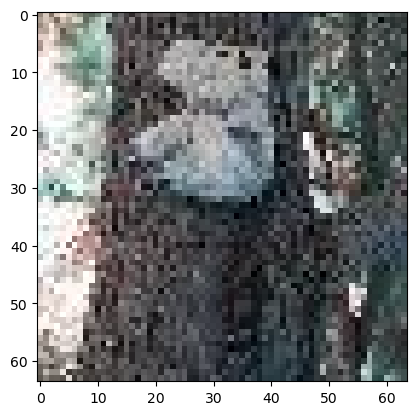

In [11]:
plt.imshow(train_fv[120])

In [12]:
train_cv=np.asarray(cv)

In [13]:
train_cv

array(['koala', 'koala', 'koala', ..., 'espresso', 'espresso', 'espresso'],
      dtype='<U11')

In [14]:
le=LabelEncoder()

In [15]:
tr_cv=le.fit_transform(train_cv)

In [16]:
tr_cv

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [17]:
#Importing validation dataset and labels

In [18]:
tlabels=pd.read_json(r"C:\Users\LENOVO\Downloads\data\val_class_dict_10.json")

In [19]:
tlabels

,val_8.JPEG,val_18.JPEG,val_47.JPEG,val_74.JPEG,val_92.JPEG,val_99.JPEG,val_105.JPEG,val_161.JPEG,val_181.JPEG,val_199.JPEG,...,val_9848.JPEG,val_9867.JPEG,val_9886.JPEG,val_9888.JPEG,val_9897.JPEG,val_9916.JPEG,val_9940.JPEG,val_9955.JPEG,val_9966.JPEG,val_9988.JPEG
class,n04146614,n04285008,n07720875,n02165456,n07720875,n04146614,n02165456,n07720875,n03662601,n02509815,...,n07873807,n03662601,n07873807,n07873807,n07720875,n07747607,n07720875,n04146614,n07720875,n04146614
description,school bus,sports car,bell pepper,ladybug,bell pepper,school bus,ladybug,bell pepper,lifeboat,panda,...,pizza,lifeboat,pizza,pizza,bell pepper,orange,bell pepper,school bus,bell pepper,school bus
index,4,9,3,1,3,4,1,3,0,7,...,2,0,2,2,3,8,3,4,3,4


In [20]:
tfv=[]
tcv=[]
for files in os.listdir(r"C:\Users\LENOVO\Downloads\data\class_10_val\val_images"):
        tfv.append(cv2.imread(r"C:\Users\LENOVO\Downloads\data\class_10_val\val_images\{}".format(files)))
        
        tcv.append(tlabels.loc["description"][files])

In [21]:
tfv

[array([[[ 45, 204, 142],
         [ 49, 208, 146],
         [ 35, 194, 132],
         ...,
         [ 57, 216, 154],
         [ 40, 196, 132],
         [115, 255, 207]],
 
        [[ 29, 188, 126],
         [ 76, 235, 173],
         [ 35, 194, 132],
         ...,
         [ 48, 207, 145],
         [116, 255, 208],
         [ 21, 177, 113]],
 
        [[ 30, 189, 127],
         [ 27, 186, 124],
         [ 79, 238, 174],
         ...,
         [ 60, 219, 157],
         [ 80, 236, 172],
         [ 56, 212, 148]],
 
        ...,
 
        [[  2, 167,  99],
         [ 20, 185, 117],
         [ 36, 199, 131],
         ...,
         [ 48, 204, 139],
         [  9, 165, 100],
         [ 28, 184, 119]],
 
        [[ 30, 198, 129],
         [  0, 156,  87],
         [ 34, 197, 129],
         ...,
         [ 16, 172, 107],
         [ 58, 214, 149],
         [ 14, 170, 105]],
 
        [[ 10, 179, 110],
         [ 36, 204, 135],
         [  0, 162,  94],
         ...,
         [ 14, 170, 105],
  

In [22]:
tcv

['ladybug',
 'orange',
 'school bus',
 'orange',
 'koala',
 'panda',
 'panda',
 'pizza',
 'espresso',
 'espresso',
 'bell pepper',
 'bell pepper',
 'koala',
 'panda',
 'bell pepper',
 'lifeboat',
 'sports car',
 'pizza',
 'espresso',
 'panda',
 'sports car',
 'ladybug',
 'orange',
 'sports car',
 'panda',
 'lifeboat',
 'pizza',
 'lifeboat',
 'bell pepper',
 'espresso',
 'koala',
 'school bus',
 'sports car',
 'espresso',
 'espresso',
 'ladybug',
 'panda',
 'lifeboat',
 'orange',
 'pizza',
 'school bus',
 'lifeboat',
 'sports car',
 'lifeboat',
 'panda',
 'orange',
 'espresso',
 'orange',
 'orange',
 'sports car',
 'school bus',
 'sports car',
 'pizza',
 'bell pepper',
 'school bus',
 'koala',
 'ladybug',
 'ladybug',
 'orange',
 'espresso',
 'espresso',
 'pizza',
 'sports car',
 'pizza',
 'school bus',
 'pizza',
 'orange',
 'school bus',
 'ladybug',
 'lifeboat',
 'sports car',
 'koala',
 'ladybug',
 'espresso',
 'school bus',
 'koala',
 'sports car',
 'panda',
 'panda',
 'pizza',
 'pizz

In [23]:
val_fv=np.asarray(tfv)

In [24]:
val_cv=le.fit_transform(tcv)

In [25]:
val_fv

array([[[[ 45, 204, 142],
         [ 49, 208, 146],
         [ 35, 194, 132],
         ...,
         [ 57, 216, 154],
         [ 40, 196, 132],
         [115, 255, 207]],

        [[ 29, 188, 126],
         [ 76, 235, 173],
         [ 35, 194, 132],
         ...,
         [ 48, 207, 145],
         [116, 255, 208],
         [ 21, 177, 113]],

        [[ 30, 189, 127],
         [ 27, 186, 124],
         [ 79, 238, 174],
         ...,
         [ 60, 219, 157],
         [ 80, 236, 172],
         [ 56, 212, 148]],

        ...,

        [[  2, 167,  99],
         [ 20, 185, 117],
         [ 36, 199, 131],
         ...,
         [ 48, 204, 139],
         [  9, 165, 100],
         [ 28, 184, 119]],

        [[ 30, 198, 129],
         [  0, 156,  87],
         [ 34, 197, 129],
         ...,
         [ 16, 172, 107],
         [ 58, 214, 149],
         [ 14, 170, 105]],

        [[ 10, 179, 110],
         [ 36, 204, 135],
         [  0, 162,  94],
         ...,
         [ 14, 170, 105],
        

In [30]:
#CNN arch
model=Sequential()
model.add(InputLayer(input_shape=(64,64,3)))
model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu")) #valid="no padding","same"=padding
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
#ANN arch
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="relu"))

model.add(BatchNormalization())
model.add(Dense(10,activation="softmax"))

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          16,910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,180 (78.83 KB)

 Trainable params: 20,160 (78.75 KB)

 Non-trainable params: 20 (80.00 B)

In [32]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [33]:
from keras.callbacks import ModelCheckpoint

# Define the filepath 
checkpoint_filepath = r'C:\Users\LENOVO\OpenCV\best_weights_cnn1.keras'

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss', 
    save_best_only=True,
    mode='min'  
)

history=model.fit(train_fv,tr_cv,epochs=60,batch_size=100,validation_data=(val_fv,val_cv), callbacks=[checkpoint_callback] )

Epoch 1/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.1072 - loss: 2.6500 - val_accuracy: 0.1320 - val_loss: 2.5372
Epoch 2/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.1505 - loss: 2.3500 - val_accuracy: 0.1840 - val_loss: 2.2077
Epoch 3/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.1621 - loss: 2.2174 - val_accuracy: 0.1840 - val_loss: 2.1519
Epoch 4/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.1840 - loss: 2.1480 - val_accuracy: 0.1920 - val_loss: 2.1356
Epoch 5/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.2034 - loss: 2.1021 - val_accuracy: 0.2360 - val_loss: 2.1168
Epoch 6/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.2283 - loss: 2.0589 - val_accuracy: 0.2640 - val_loss: 2.0710
Epoch 7/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.2234 - loss: 2.0596 - val_accuracy: 0.2680 - val_loss: 2.0739
Epoch 8/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.2403 - loss: 2.0244 - val_accuracy

In [ ]:
from keras.models import load_model

# Load the model architecture
best_model = load_model(r'C:\Users\LENOVO\OpenCV\best_weights_cnn1.keras')

In [ ]:
#Testing
test_img=cv2.imread(r"C:\Users\LENOVO\Downloads\data\class_10_val\val_images\val_353.JPEG")

In [ ]:
test_img.shape

In [ ]:
le.inverse_transform([np.argmax(best_model.predict(test_img[np.newaxis]))])